In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image


sns.set_palette('crest')

In [3]:
df = pd.read_csv('repository_data.csv')

# Пункт 0

In [4]:
df

,name,stars_count,forks_count,watchers,pull_requests,primary_language,languages_used,commit_count,created_at,licence
0,freeCodeCamp,359805,30814,8448,31867,TypeScript,"['TypeScript', 'JavaScript', 'CSS', 'Shell', '...",32231.0,2014-12-24T17:49:19Z,"BSD 3-Clause ""New"" or ""Revised"" License"
1,996.ICU,264811,21470,4298,1949,NaN,NaN,3189.0,2019-03-26T07:31:14Z,Other
2,free-programming-books,262380,53302,9544,8235,NaN,NaN,8286.0,2013-10-11T06:50:37Z,Other
3,coding-interview-university,244927,65038,8539,867,NaN,NaN,2314.0,2016-06-06T02:34:12Z,Creative Commons Attribution Share Alike 4.0 I...
4,awesome,235223,24791,7446,1859,NaN,NaN,1074.0,2014-07-11T13:42:37Z,Creative Commons Zero v1.0 Universal
...,...,...,...,...,...,...,...,...,...,...
2917946,FastledServer,6,1,1,0,HTML,"['HTML', 'C++', 'TypeScript', 'JavaScript']",3.0,2022-01-24T00:33:33Z,NaN
2917947,zero-motorcycle-canbus,6,3,2,0,C++,"['C++', 'C']",3.0,2022-01-23T21:51:51Z,MIT License
2917948,common-object-management-service,6,7,6,99,JavaScript,"['JavaScript', 'Smarty', 'Dockerfile']",504.0,2022-01-26T19:08:25Z,Apache License 2.0
2917949,MSI-Z690-Carbon-i7-12700KF-Hackintosh,6,5,1,0,NaN,NaN,1.0,2022-01-24T03:27:16Z,NaN


Данная таблица содержит различную информацию про репозитории на гитхабе, that is:

* name - имя репа
* stars_count - кол-во звезд.
* forks_count - кол-во форков.
* watchers - кол-во зрителей/наблюдателей.
* pull_requests - кол-во пул реквестов
* primary_language - основной используемый яп.
* languages_used - лист всех используемых япов.
* commit_count - кол-во коммитов.
* created_at - дата-время создания.
* license - лицензия.

> - 10 столбцов
> - 2917951 записей

side note: хотя юпитерская тетрадка сама показывает инфу по датасету, ниже представлен 'стандартный' способ получить ту же инфу.

In [5]:
general_shape = df.shape
print('Кол-во столбцов:', general_shape[1])
print('Кол-во строк:', general_shape[0])
print('Список столбцов:\n>', '\n> '.join(df.columns))

Кол-во столбцов: 10
Кол-во строк: 2917951
Список столбцов:
> name
> stars_count
> forks_count
> watchers
> pull_requests
> primary_language
> languages_used
> commit_count
> created_at
> licence


Типы информации представлены ниже

In [6]:
df.dtypes

,0
name,object
stars_count,int64
forks_count,int64
watchers,int64
pull_requests,int64
primary_language,object
languages_used,object
commit_count,float64
created_at,object
licence,object


Есть ли пропуски в таблице? - True


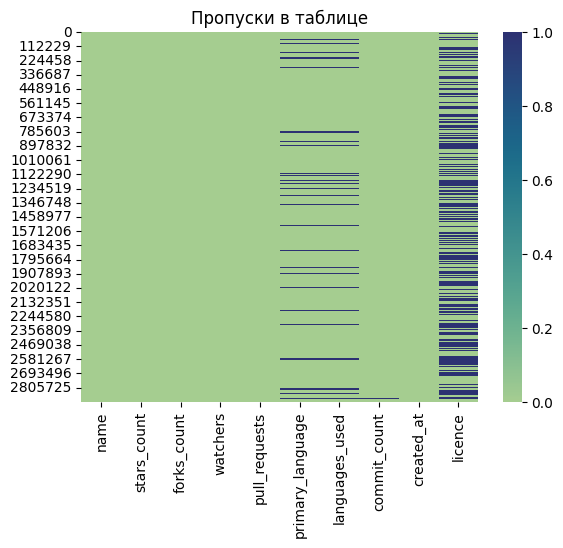

In [7]:
is_null_temp = df.isnull()
print('Есть ли пропуски в таблице? -', is_null_temp.values.any())
sns.heatmap(is_null_temp,
            cmap='crest')
plt.title('Пропуски в таблице')
plt.show()

In [8]:
print('Сколько повторений в таблице? - ', len(list(filter(bool, df.duplicated().values))))

Сколько повторений в таблице? -  66508


С таблице есть много пропусков, в частности в колонке licence (и немного в primary_language и languages_used. И один пропуск в commit_count), как видно из хитмапа выше. Также, есть 66508 повторений.

# Пункт 1

1.1 Данные уже проверены на наличие пропусков выше (пропуски есть). Т.к. никакой из столбцов, которые имеет пропуски (кроме commit_count, где есть один пропуск), не содержит численные значения, то придется заполнить эти пропуски пустыми строчками и не учитывать эти вхождения в анализе, связанным с данными столбцами. Один пропуск в commit_count можно заполнить средним значением остальных вхождений в данном столбце.

In [9]:
df['commit_count'] = df.commit_count.fillna(df.commit_count.mean())
df.commit_count.isnull().values.any() # проверка, что нет пропусков

False

In [10]:
df = df.fillna('')
df.isnull().values.any() # проверка, что нет пропусков

False

In [11]:
df = df.drop_duplicates() # удалить те самые 66508 повторений
df.shape

(2851443, 10)

1.2 Удалять какие-либо выбросы я не хочу, кроме слишком низких значений в stars_count, таким образом удаляя все 'незначительные'* (и просто личные) репозитории.

*Незначительный - см. [link](https://github-roaster.programordie.workers.dev/), чтобы понять, о чем я говорю (хохма)

Основываясь на графике ниже, думаю, будет рационально удалить все записи, где stars_count меньше 10. Не хочется удалять те, где stars_count большой, т.к. это 'важные' репозитории.

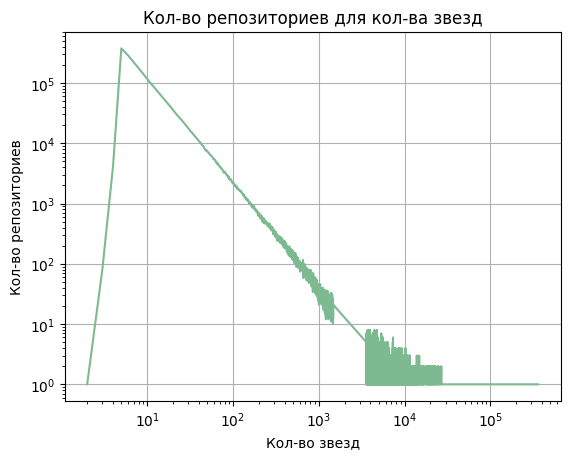

In [12]:
sns.lineplot(data=df.groupby(by='stars_count').count(),
             x='stars_count',
             y='name')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Кол-во репозиториев')
plt.xlabel('Кол-во звезд')
plt.title('Кол-во репозиториев для кол-ва звезд')
plt.grid()
plt.show()

In [13]:
df = df[df.stars_count >= 10]

1.3 Параллельно со 2-ым подпунктом появилась гипотеза/идея. Гипотеза as follows: репозиториев с большим количеством звезд меньше, чем с маленьким. Данное предположение kinda верное, но в районе 7'000-17'000 звезд заметна настабильность, но, в целом, наблюдается скачек в кол-ве репозиториев. Кажется, было бы интересно посмотреть на основные языки, используемые в данных репах. Но перед тем как строить график, хочется удалить редко встречающиеся языки (менее 50 записей), чтобы график был чище и содержательнее.

In [14]:
df_around_10k = df[(7000 <= df.stars_count) & (df.stars_count < 17000)]

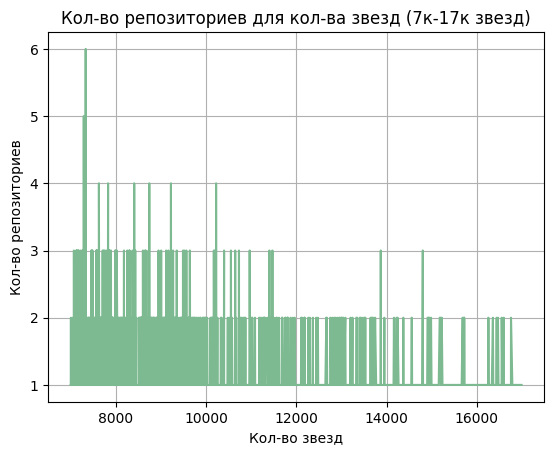

In [15]:
# промежуточное действие, чтобы посмотреть на концентрацию данных,
# подобрать нужные пределы кол-ва звезд (чтобы хотя бы по 2 репа)

sns.lineplot(data=df_around_10k.groupby(by='stars_count').count(),
             x='stars_count',
             y='name')
plt.ylabel('Кол-во репозиториев')
plt.xlabel('Кол-во звезд')
plt.title('Кол-во репозиториев для кол-ва звезд (7к-17к звезд)')
plt.grid()
plt.show()

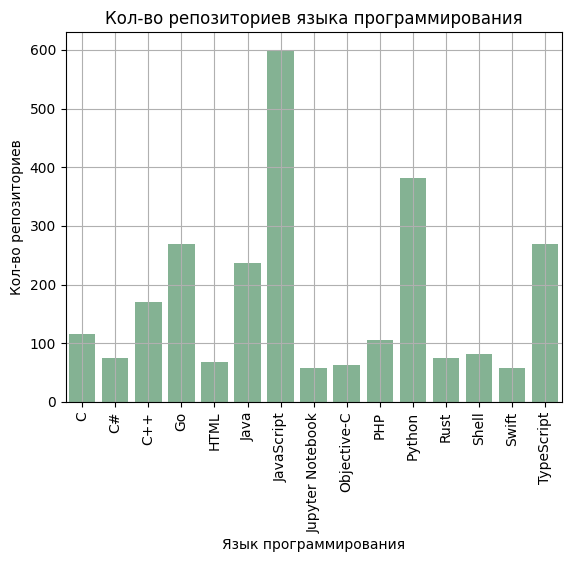

In [16]:
df_around_10k_grouped = df_around_10k.groupby(by='primary_language').count()
df_around_10k_grouped = df_around_10k_grouped[
    (df_around_10k_grouped.name >= 50) &
    (df_around_10k_grouped.index != '')]
sns.barplot(data=df_around_10k_grouped,
            x='primary_language',
            y='name')
plt.ylabel('Кол-во репозиториев')
plt.xlabel('Язык программирования')
plt.title('Кол-во репозиториев языка программирования')
plt.grid()
plt.xticks(rotation=90)
plt.show()

Кучу JS'а и TS'а (и питона, и php, и html), так что, скорее всего, это какие-то веб проекты.
Остальное - софт.
Ну так, в принципе, с виду 50/50, но можно проверить. Пусть JavaScript, TypeScript, PHP, HTML, Python - это веб, а остальное - софт.

In [17]:
web_langs = df_around_10k_grouped[df_around_10k_grouped.index.isin(
    ['JavaScript', 'TypeScript', 'PHP', 'HTML', 'Python'])].name.sum()
all_langs = df_around_10k_grouped.name.sum()

print(
    f'веб/софт = {web_langs / all_langs}/{(all_langs - web_langs) / all_langs}')

веб/софт = 0.5424438523030072/0.45755614769699277


Ну почти. 54/46 на самом деле

1.4 Гипотеза. Основываясь на словах В.И. (и на мемах), предположу, что в среднем у репозиториев с основным языком Rust звезд больше, чем с С++. А вообще, можно просто посмотреть, с какими (основными) языками звезд больше. Но, опять же, ограничевать себя на +-10к звезд не хочется, буду смотреть на вообще все (у которых хотя бы 10 звезд)

In [18]:
df_grouped_1 = df[df.primary_language != ''].groupby(
    by='primary_language').count()
df_grouped_2 = df[df.primary_language != ''].groupby(
    by='primary_language').stars_count.mean()
df_grouped_1['avg_stars_count'] = df_grouped_2
df_grouped_1 = df_grouped_1[df_grouped_1.name >= 5000].sort_values(by='avg_stars_count')

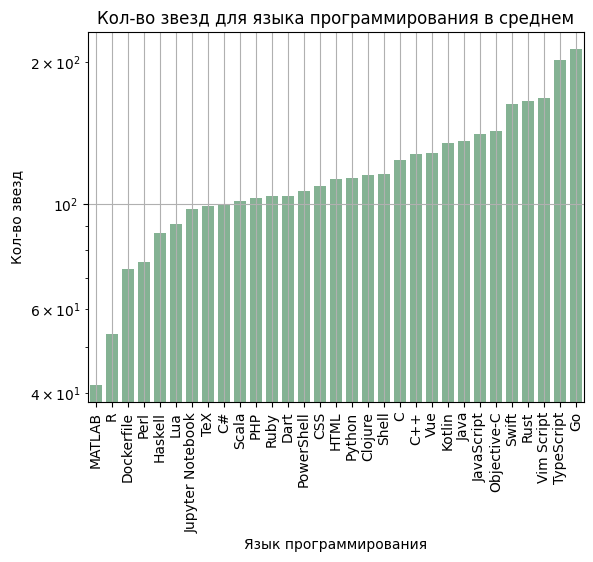

In [19]:
sns.barplot(data=df_grouped_1, x='primary_language', y='avg_stars_count')
plt.yscale('log')
plt.xticks(rotation=90)
plt.ylabel('Кол-во звезд')
plt.xlabel('Язык программирования')
plt.title('Кол-во звезд для языка программирования в среднем')
plt.grid()
plt.show()

Пришлось еще обрезать те языки, на которых менее 5к проектов. Результат: у раста (репах с основным языком - раст) в среднем больше звезд, чем у плюсов. А вообще, пишите на Go, если хотите получать по 200 звезд на проекте.

1.5 Гипотеза: репозитории с linux в названии в среднем имеют больше звезд, чем с win

In [20]:
print('w/ linux', df[df.name.str.contains('linux')].stars_count.mean())
print('w/ win', df[-df.name.str.contains('win')].stars_count.mean())

w/ linux 195.41505715411904
w/ win 128.42656078664388


Гипотеза верная, с linux в названии в среднем больше звезд, чем с win

1.6 Гипотеза: чем глубже в лес, тем больше фембоев. ну то есть чем ближе к нынешнему времени, тем больше соотношение проектов на расте к проектам на плюсах.

In [21]:
df_cpp_and_rust = df[df.primary_language.isin(['C++', 'Rust'])]

In [22]:
df_cpp_and_rust['created_at'] = pd.to_datetime(df_cpp_and_rust.created_at)

<ipython-input-22-5cd284b98a23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpp_and_rust['created_at'] = pd.to_datetime(df_cpp_and_rust.created_at)


In [23]:
df_cpp_and_rust['year'] = df_cpp_and_rust.created_at.dt.to_period('Y')

<ipython-input-23-4a9474b76755>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_cpp_and_rust['year'] = df_cpp_and_rust.created_at.dt.to_period('Y')
<ipython-input-23-4a9474b76755>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpp_and_rust['year'] = df_cpp_and_rust.created_at.dt.to_period('Y')


In [24]:
df_cpp_and_rust_counted = df_cpp_and_rust.groupby(
    by=['year', 'primary_language']
    ).count().reset_index().sort_values('year')

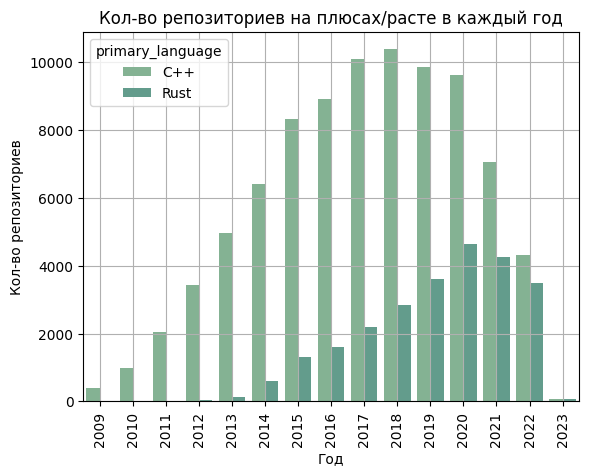

In [25]:
sns.barplot(
    data=df_cpp_and_rust_counted,
    x='year',
    y='name',
    hue='primary_language')
plt.xticks(rotation=90)
plt.ylabel('Кол-во репозиториев')
plt.xlabel('Год')
plt.grid()
plt.title('Кол-во репозиториев на плюсах/расте в каждый год')
plt.show()

Выше показано просто количество проектов для каждого года на плюсах и расте. Интересно, что пик плюсов был в 2018 г., а пик раста - в 2020 г.

Ниже показано соотношение для каждого года

In [26]:
df_cpp_and_rust_counted['repo_sum'] = np.repeat(
    df_cpp_and_rust_counted.groupby('year').name.sum().values, 2)
df_cpp_and_rust_counted['ratio'] =\
df_cpp_and_rust_counted.name / df_cpp_and_rust_counted.repo_sum

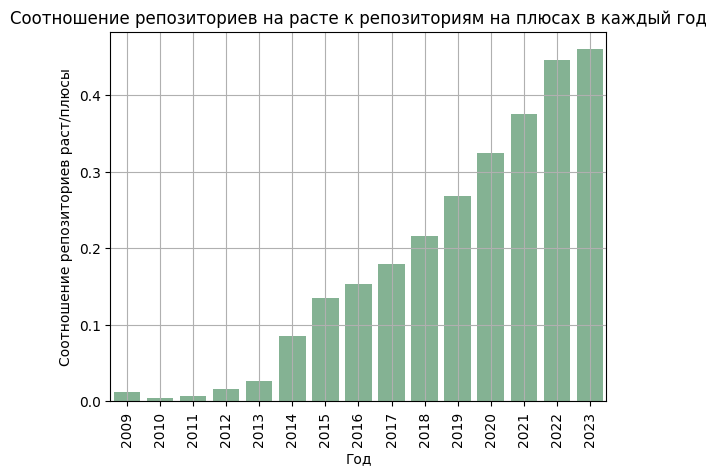

In [27]:
sns.barplot(
    data=df_cpp_and_rust_counted[
        df_cpp_and_rust_counted.primary_language == 'Rust'],
    x='year',
    y='ratio')
plt.xticks(rotation=90)
plt.ylabel('Соотношение репозиториев раст/плюсы')
plt.xlabel('Год')
plt.grid()
plt.title(
    'Соотношение репозиториев на расте к репозиториям на плюсах в каждый год')
plt.show()

Гипотеза верна

# Пункт 2

Небольшая сводка тех графиков, которые уже есть:
1. lineplot (2, но серьезная только 1)
2. barplot (3)
5. heatmap (1)

Осталось:
3. pie (1)
4. displot/histplot (1)
6. Облако слов (2)

Для круговой можно посмотреть на соотношение репозиториев на 'веб' языках в районе 10k звезд

In [28]:
df_web_langs = df_around_10k_grouped[df_around_10k_grouped.index.isin(['JavaScript', 'TypeScript', 'PHP', 'HTML', 'Python'])]

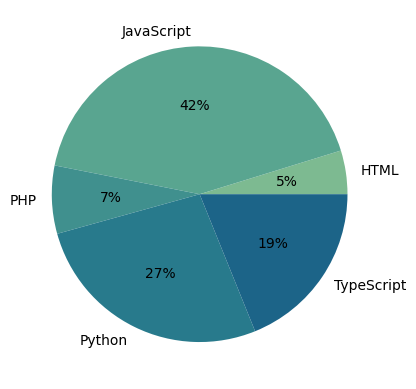

In [29]:
plt.pie(df_web_langs.name, labels=df_web_langs.index, autopct='%.0f%%')
plt.show()

Для гистограммы можно посмотреть на зависимость коммитов от звезд

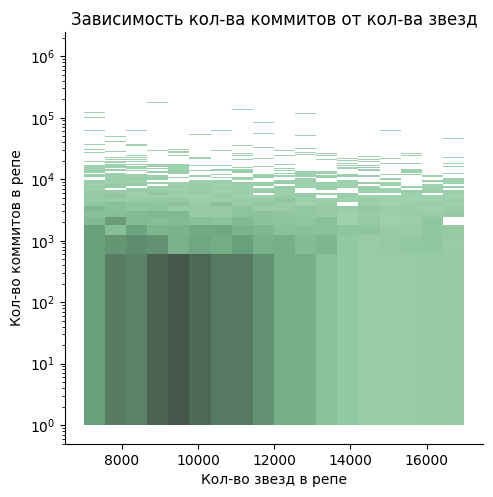

In [31]:
sns.displot(
    data=df_around_10k.groupby(
        'commit_count').stars_count.mean().reset_index(),
    x='stars_count',
    y='commit_count')
plt.yscale('log')
plt.ylabel('Кол-во коммитов в репе')
plt.xlabel('Кол-во звезд в репе')
plt.title('Зависимость кол-ва коммитов от кол-ва звезд')
plt.show()

Облако слов по языкам в проектах с +-10k звезд, но в этот раз не буду обрезать по кол-ву репозиториев

In [45]:
df_around_10k_grouped_1 = df_around_10k.groupby(by='primary_language').count()
df_around_10k_grouped_1 = df_around_10k_grouped_1[
    (df_around_10k_grouped_1.index != '')]

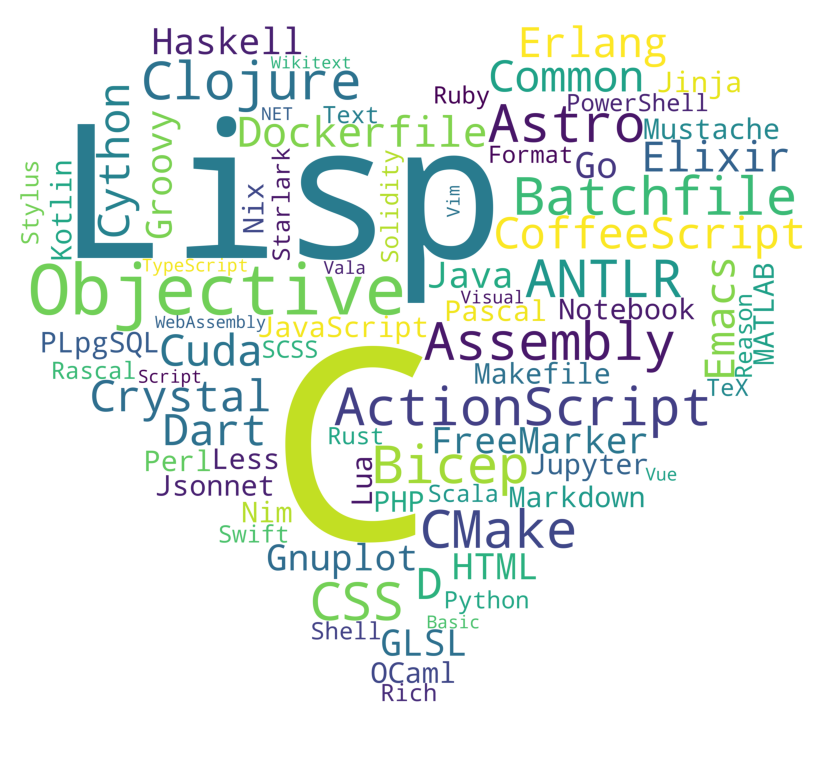

In [87]:
comment_words = ''
stopwords = set(STOPWORDS)
mask = np.array(Image.open(r'heart.png'))

for val in df_around_10k_grouped_1.index:
    val = str(val)
    tokens = val.split()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                mask = mask).generate(comment_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Другое облако слов пусть будет из названий репозиториев. Буду брать только те, где есть дефис (то бишь без CamelCase, потому его никто не любит энивей) и разделять названия по этому дефису

In [53]:
df_with_dashes = df[df.name.str.contains('-')]
temp_indexes = list(df_with_dashes.columns)
temp_indexes.remove('name')
df_with_dashes_splited = (df_with_dashes.set_index(temp_indexes)
   .apply(lambda x: x.str.split('-').explode())
   .reset_index())

In [81]:
df_with_dashes_splited_grouped = df_with_dashes_splited.groupby(
    'name').licence.count().reset_index()
df_with_dashes_splited_grouped =\
df_with_dashes_splited_grouped\
[(-df_with_dashes_splited_grouped.name.isin(['.', '', 'in'])) &
 (df_with_dashes_splited_grouped.licence > 1)]

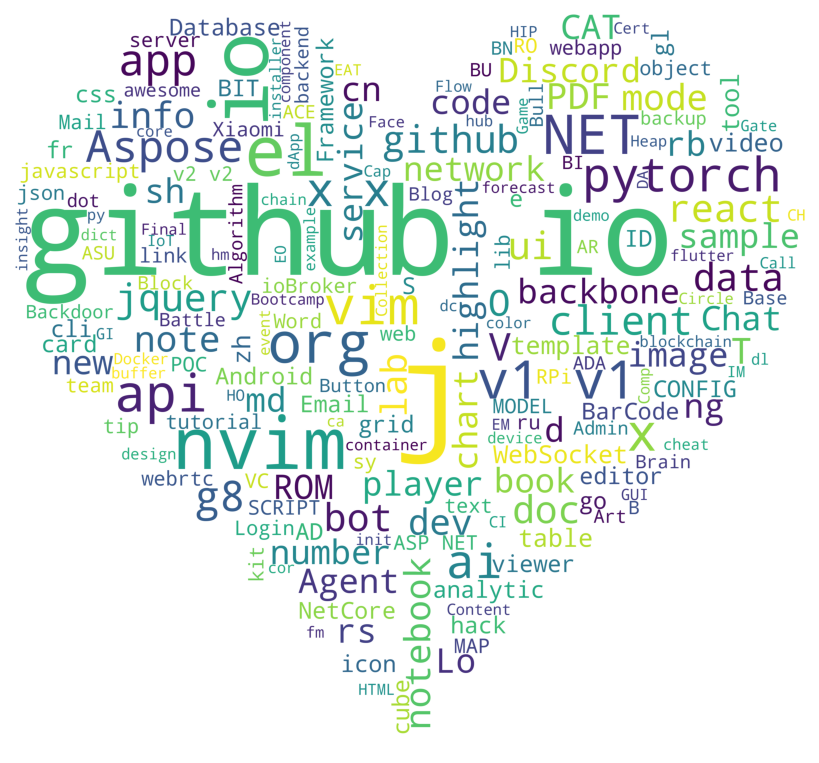

In [88]:
comment_words = ''
stopwords = set(STOPWORDS)
mask = np.array(Image.open(r'heart.png'))

for val in df_with_dashes_splited_grouped.name:
    val = str(val)
    tokens = val.split()
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                mask = mask).generate(comment_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [212]:
df['created_at'] = pd.to_datetime(df.created_at)

In [219]:
df['year'] = df.created_at.dt.to_period('Y').dt.strftime('%Y')

<ipython-input-219-b5a9f840db71>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year'] = df.created_at.dt.to_period('Y').dt.strftime('%Y')


In [220]:
df_10krepos =\
df[df.primary_language != '']\
.groupby(
    by=['primary_language', 'stars_count', 'forks_count', 'licence', 'year']
    ).count()\
.reset_index()

In [221]:
df_10krepos_temp = df_10krepos.groupby('primary_language').sum()
df_10krepos_temp = df_10krepos_temp[df_10krepos_temp.name >= 50000]
df_10krepos =\
df_10krepos[df_10krepos.primary_language.isin(df_10krepos_temp.index.values)]

In [222]:
df_10krepos

,primary_language,stars_count,forks_count,licence,year,name,watchers,pull_requests,languages_used,commit_count,created_at
11151,C,10,0,,2009,6,6,6,6,6,6
11152,C,10,0,,2010,5,5,5,5,5,5
11153,C,10,0,,2011,9,9,9,9,9,9
11154,C,10,0,,2012,10,10,10,10,10,10
11155,C,10,0,,2013,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...
898326,TypeScript,85963,22872,MIT License,2014,1,1,1,1,1,1
898327,TypeScript,87776,11373,Apache License 2.0,2014,1,1,1,1,1,1
898328,TypeScript,141614,24514,MIT License,2015,1,1,1,1,1,1
898329,TypeScript,201896,33255,MIT License,2013,1,1,1,1,1,1


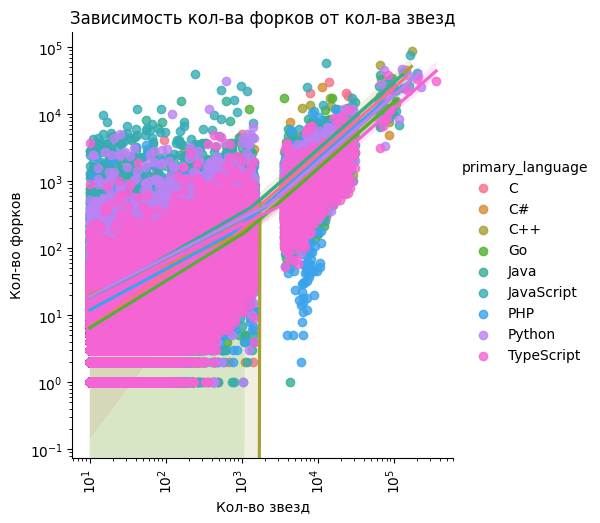

In [224]:
sns.lmplot(
    data=df_10krepos,
    x='stars_count',
    y='forks_count',
    hue='primary_language')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Кол-во форков')
plt.xlabel('Кол-во звезд')
plt.xticks(rotation=90)
plt.title('Зависимость кол-ва форков от кол-ва звезд')
plt.show()

Я хотел разделить график выше на несколько графиков (аргументы col и row) по лицензии и году, но это занимало слишком долго времени, и я не долждался. В общем, это lmplot, вкраце: берет все точки (в данном случае зависимость форков от звезд) и строит по ним какую-то среднюю линию. Не данном графике не должно быть особо различия в языках (ниче не видно, но инфы достаточно), они все плюс-минус одинаковые, выбивается раве что TS чуть-чуть выбивается: при таком же количестве форков у него больше звезд. Взяты только языки, на которых 50k+ реп. И интересно: где-то в районе 5k звезд виден большая дыра, где репозиториев вообще нет.